In [1]:
import sys
sys.path.append('..')

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [4]:
import astropy.units as u

In [5]:
from gunagala import imager

/home/ajh/Documents/virtualenvs/Python3.5.2/lib/python3.5/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [6]:
imagers = imager.create_imagers()

data/performance_data/canon_throughput.csv
data/performance_data/ase160_throughput.csv


In [7]:
huntsman = imagers['canon_sbig']

In [8]:
space_eye = imagers['ase_e2v']

In [9]:
huntsman.filter_names

dict_keys(['g', 'r'])

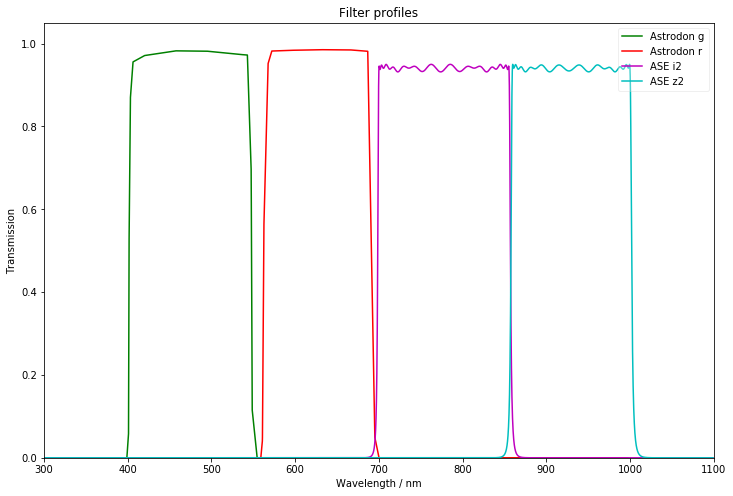

In [10]:
waves = huntsman.wavelengths
plt.plot(waves, huntsman.filters['g'].transmission(waves), 'g-', label='Astrodon g')
plt.plot(waves, huntsman.filters['r'].transmission(waves), 'r-', label='Astrodon r')

waves2 = space_eye.wavelengths
plt.plot(waves2, space_eye.filters['ase_i2'].transmission(waves2), 'm-', label='ASE i2')
plt.plot(waves2, space_eye.filters['ase_z2'].transmission(waves2), 'c-', label='ASE z2')

plt.legend(loc='upper right', fancybox=True, framealpha=0.3)

plt.xlabel('Wavelength / nm')
plt.ylabel('Transmission')
plt.title('Filter profiles')
plt.xlim(300,1100)
plt.ylim(0,1.05)

plt.gcf().set_size_inches(12,8)

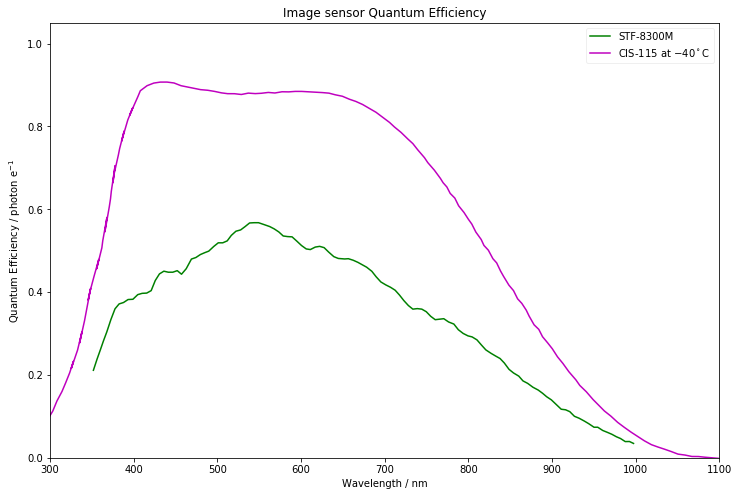

In [11]:
plt.plot(huntsman.camera.wavelengths, huntsman.camera.QE, 'g-', label='STF-8300M')
plt.plot(space_eye.camera.wavelengths, space_eye.camera.QE, 'm-', label='CIS-115 at $-40^\circ$C')

plt.legend(loc='upper right', fancybox=True, framealpha=0.3)

plt.xlabel('Wavelength / nm')
plt.ylabel('Quantum Efficiency / photon e$^{-1}$')
plt.title('Image sensor Quantum Efficiency')
plt.xlim(300, 1100)
plt.ylim(0,1.05)

plt.gcf().set_size_inches(12,8)

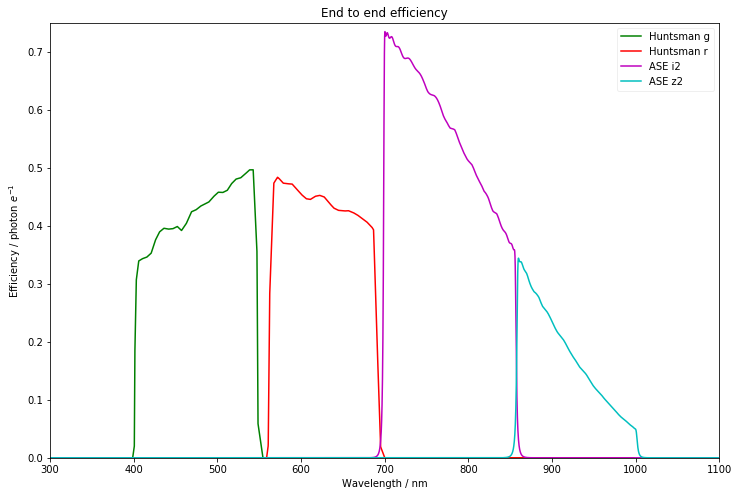

In [12]:
waves = huntsman.wavelengths
plt.plot(waves, huntsman.efficiencies['g'], 'g-', label='Huntsman g')
plt.plot(waves, huntsman.efficiencies['r'], 'r-', label='Huntsman r')

waves2 = space_eye.wavelengths
plt.plot(waves2, space_eye.efficiencies['ase_i2'], 'm-', label='ASE i2')
plt.plot(waves2, space_eye.efficiencies['ase_z2'], 'c-', label='ASE z2')

plt.legend(loc='upper right', fancybox=True, framealpha=0.3)

plt.xlabel('Wavelength / nm')
plt.ylabel('Efficiency / photon $e^{-1}$')
plt.title('End to end efficiency')
plt.xlim(300, 1100)
plt.ylim(0, 0.75)

plt.gcf().set_size_inches(12,8)

In [13]:
sb = space_eye.sky.surface_brightness()

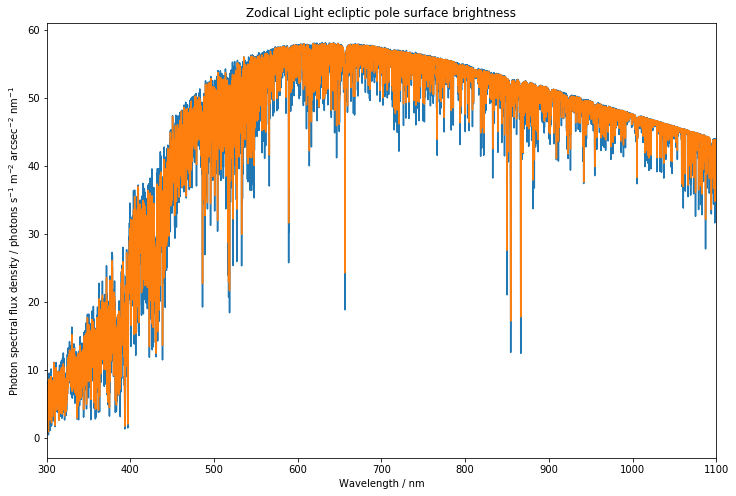

In [14]:
plt.plot(space_eye.sky.waves.to(u.nm), space_eye.sky.photon_sfd)
plt.plot(space_eye.wavelengths, sb(space_eye.wavelengths))
plt.xlim(300, 1100)
plt.title('Zodical Light ecliptic pole surface brightness')
plt.xlabel('Wavelength / nm')
plt.ylabel('Photon spectral flux density / photons s$^{-1}$ m$^{-2}$ arcsec$^{-2}$ nm$^{-1}$')
plt.gcf().set_size_inches(12, 8)

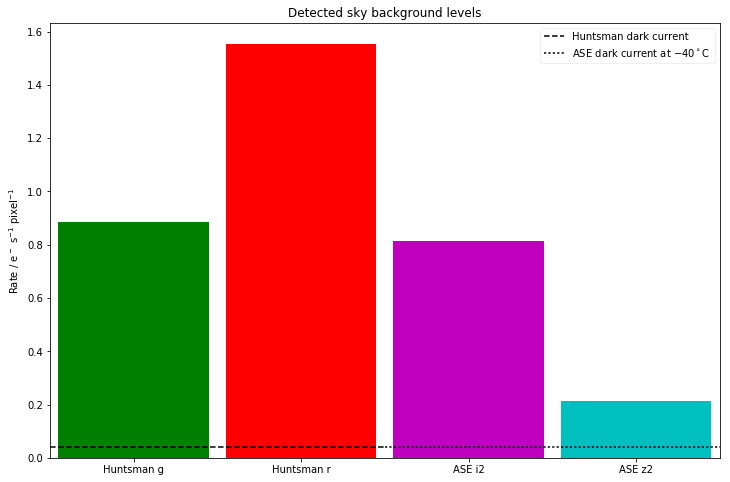

In [15]:
plt.bar((1, 2), (huntsman.sky_rate['g'].value, huntsman.sky_rate['r'].value),
        width=0.9, align='center', color=('g', 'r'))
plt.hlines(huntsman.camera.dark_current.value, 0.5, 2.5, linestyle='dashed', label='Huntsman dark current')

plt.bar((3, 4), (space_eye.sky_rate['ase_i2'].value, space_eye.sky_rate['ase_z2'].value),
        width=0.9, align='center', color=('m', 'c'))
plt.hlines(space_eye.camera.dark_current.value, 2.5, 4.5, linestyle='dotted', label='ASE dark current at $-40^\circ$C')

plt.legend(loc='upper right', fancybox=True, framealpha=0.3)
plt.xticks((1, 2, 3, 4), ('Huntsman g', 'Huntsman r', 'ASE i2', 'ASE z2'))
plt.xlim(0.5,4.5)
plt.ylabel('Rate / e$^-$ s$^{-1}$ pixel$^{-1}$')
plt.title('Detected sky background levels')

plt.gcf().set_size_inches(12, 8)

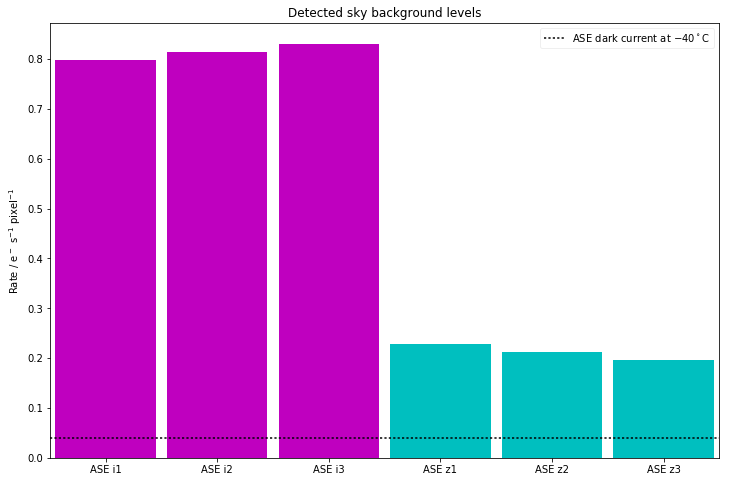

In [16]:
plt.bar((1, 2, 3, 4, 5, 6),
        (space_eye.sky_rate['ase_i1'].value,
         space_eye.sky_rate['ase_i2'].value,
         space_eye.sky_rate['ase_i3'].value,
         space_eye.sky_rate['ase_z1'].value,
         space_eye.sky_rate['ase_z2'].value,
         space_eye.sky_rate['ase_z3'].value),
        width=0.9, align='center', color=('m', 'm', 'm', 'c', 'c', 'c'))
plt.hlines(space_eye.camera.dark_current.value, 0.5, 6.5, linestyle='dotted', label='ASE dark current at $-40^\circ$C')

plt.legend(loc='upper right', fancybox=True, framealpha=0.3)
plt.xlim(0.5,6.5)
plt.xticks((1, 2, 3, 4, 5, 6), ('ASE i1', 'ASE i2', 'ASE i3', 'ASE z1', 'ASE z2', 'ASE z3'))
plt.ylabel('Rate / e$^-$ s$^{-1}$ pixel$^{-1}$')
plt.title('Detected sky background levels')

plt.gcf().set_size_inches(12, 8)